In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
df_rsumm = pd.read_csv("reviews_amsterdam.csv")
print("reviews_summary : " + str(df_rsumm.shape))
df_rsumm

reviews_summary : (266861, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
266856,52946755,483838034832851376,2021-10-29,6392852,New,Wauw! Honestly one of my best Airbnb experienc...
266857,52946755,484583230927988381,2021-10-30,95158280,Otto,Fantastic apartment at a very central location...
266858,52974738,485317387093868629,2021-10-31,194929002,Anna,Perfect spot to explore Amsterdam. The apartme...
266859,52974738,486692803591332704,2021-11-02,190439964,Sofie,"Fijn en persoonlijk ontvangen, Tim is erg soci..."


In [18]:
import datetime
def mapper(month):
    date = datetime.datetime(2000, month, 1)  # You need a dateobject with the proper month
    return date.strftime('%b') 

In [19]:
df_rsumm['date'] = pd.to_datetime(df_rsumm['date'])
df_rsumm['year'] = df_rsumm['date'].dt.year
df_rsumm['month'] = df_rsumm['date'].dt.month
df_rsumm['day'] = df_rsumm['date'].dt.day

df_rsumm['year'] = df_rsumm['year'].astype(int)
df_rsumm['month'] = df_rsumm['month'].astype(int)
df_rsumm['day'] = df_rsumm['day'].astype(int)
df_rsumm.sort_values(['year', 'month'], ascending=[True, True],axis=0,inplace=True)

In [20]:
df_rsumm['month'] = df_rsumm['month'].apply(mapper)

In [21]:
df_rsumm_orig = df_rsumm.copy(deep=False) 

In [22]:
dropped = ['reviewer_name','comments']
df_rsumm.drop(dropped,axis=1,inplace=True)

In [23]:
df_rsumm['year'].value_counts()

2019    66122
2018    51736
2017    38915
2021    27129
2016    26581
2020    25598
2015    16521
2014     8902
2013     3989
2012     1072
2011      249
2010       35
2009       12
Name: year, dtype: int64

In [24]:
df_2019 = df_rsumm[df_rsumm['year'] == 2019]
df_2018 = df_rsumm[df_rsumm['year'] == 2018]
df_2017 = df_rsumm[df_rsumm['year'] == 2017]
df_2020 = df_rsumm[df_rsumm['year'] == 2020]

In [25]:
dropped = ['year','day','id','date','listing_id']
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020.drop(dropped,axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
df_2018["count"] = df_2018.groupby("month")["reviewer_id"].transform('count')
df_2017["count"] = df_2017.groupby("month")["reviewer_id"].transform('count')

<ipython-input-26-9a2a7c08a516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
<ipython-input-26-9a2a7c08a516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
<ipython-input-26-9a2a7c08a516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [27]:
dropped = ['reviewer_id']
df_2020.drop(dropped,axis=1,inplace=True)
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020 = df_2020.drop_duplicates()
df_2019 = df_2019.drop_duplicates()
df_2018 = df_2018.drop_duplicates()
df_2017 = df_2017.drop_duplicates()
df_2020=df_2020.reset_index(drop=True)
df_2019=df_2019.reset_index(drop=True)
df_2018=df_2018.reset_index(drop=True)
df_2017=df_2017.reset_index(drop=True)

df_2020

,month,count
0,Jan,4536
1,Feb,4807
2,Mar,2508
3,Apr,107
4,May,254
5,Jun,1236
6,Jul,3329
7,Aug,4226
8,Sep,2458
9,Oct,1045


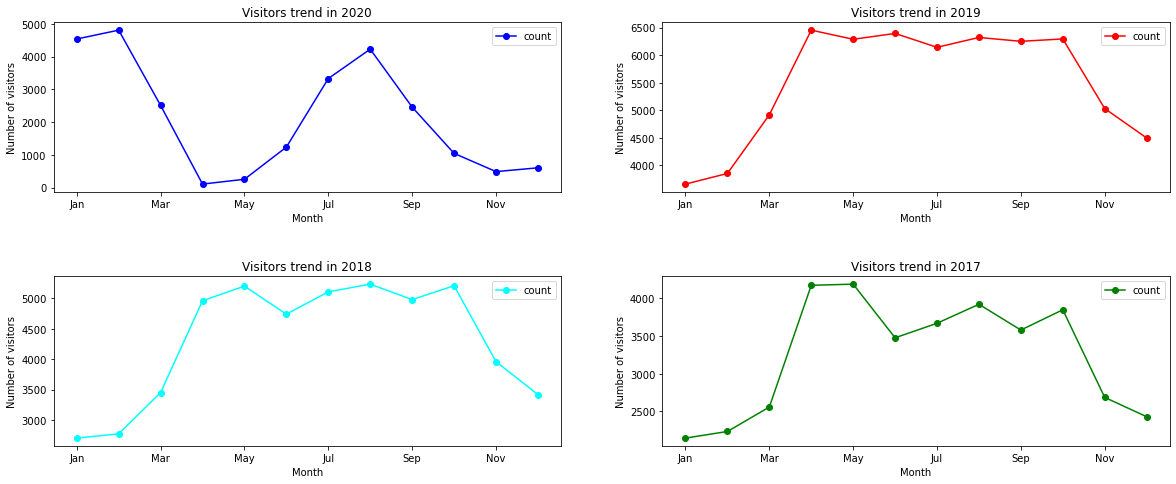

In [28]:

fig = plt.figure(figsize=(20, 6))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_2020.plot(kind='line', color='blue', x='month',y='count',marker='o',ax=ax0) # add to subplot 1
ax0.set_title('Visitors trend in 2020')
ax0.set_xlabel('Month')
ax0.set_ylabel('Number of visitors')

df_2019.plot(kind='line', color='red', x='month',y='count',marker='o',ax=ax1) # add to subplot 2
ax1.set_title('Visitors trend in 2019')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of visitors')

df_2018.plot(kind='line', color='cyan', x='month',y='count',marker='o',ax=ax2) # add to subplot 3
ax2.set_title('Visitors trend in 2018')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of visitors')

df_2017.plot(kind='line', color='green', x='month',y='count',marker='o',ax=ax3) # add to subplot 4
ax3.set_title('Visitors trend in 2017')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of visitors')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5)
plt.show()

we can see april-may is the most demanded season
and also in most cases 2019-2017 januray,march ,feb ,nov and dec is the off season excpet in 2020 april is the off season